<a href="https://colab.research.google.com/github/adijams01/thermo_regression_01/blob/main/Thermo_regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-10-29 12:49:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-29 12:49:22 (48.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [7]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
project_01 = pd.read_csv("https://raw.githubusercontent.com/adijams01/thermo_regression_01/main/regression_csv_01.csv")

In [9]:
project_01.head()

,latitude,altitude,precipitation,humidity,windspeed,temperature
0,34.1526,3500.0,102.0,70.0,1.4,5.0
1,34.5539,2676.0,327.0,76.0,5.0,7.5
2,34.3201,2987.0,76.2,54.0,11.3,3.0
3,32.9681,4595.0,76.2,70.0,8.8,-0.5
4,34.0837,1585.0,720.0,73.0,4.8,10.8


In [10]:
x=project_01.drop("temperature",axis=1)
y=project_01["temperature"]

In [11]:
x.head()

,latitude,altitude,precipitation,humidity,windspeed
0,34.1526,3500.0,102.0,70.0,1.4
1,34.5539,2676.0,327.0,76.0,5.0
2,34.3201,2987.0,76.2,54.0,11.3
3,32.9681,4595.0,76.2,70.0,8.8
4,34.0837,1585.0,720.0,73.0,4.8


In [12]:
# Creating training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42)

In [13]:
len(x_train),len(x_test)

(92, 24)

# Modelling

## without normalisation

### model_01

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_01=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_01.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=['mae'])
# Fit the model
history=model_01.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 6ms/step - loss: 910.6612 - mae: 910.6612
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 217804.4375 - mae: 217804.4375
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 119963512.0000 - mae: 119963512.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 148897136640.0000 - mae: 148897136640.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 244673650098176.0000 - mae: 244673650098176.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 152940486875676672.0000 - mae: 152940486875676672.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 98468215180828344320.0000 - mae: 98468215180828344320.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 186131268597829781684224.0000 - mae: 186131268597829781684224.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - l

### model_02

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_02=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_02.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae'])
# Fit the model
history=model_02.fit(x_train,y_train,epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 35.2633 - mae: 35.2633
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 17.1658 - mae: 17.1658
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 12.4004 - mae: 12.4004
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 10.4506 - mae: 10.4506
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 8.4700 - mae: 8.4700
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 10.9949 - mae: 10.9949
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 7.7647 - mae: 7.7647
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 11.3914 - mae: 11.3914
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 11.0554 - mae: 11.0554
Epoch 11/100
3/3 [==============================] - 0s 4ms/step -

In [16]:
model_02.evaluate(x_test,y_test)

1/1 [==============================] - 0s 120ms/step - loss: 8.5077 - mae: 8.5077


[8.50769329071045, 8.50769329071045]

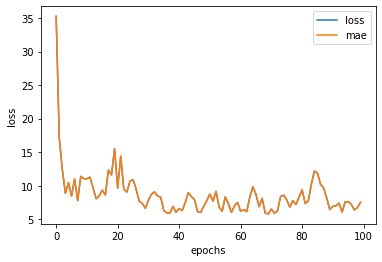

In [17]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_03

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_03=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_03.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae'])
# Fit the model
history=model_03.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 0s 5ms/step - loss: 35.2633 - mae: 35.2633
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 17.1658 - mae: 17.1658
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 12.4004 - mae: 12.4004
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 8.8756 - mae: 8.8756
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 10.4506 - mae: 10.4506
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 8.4700 - mae: 8.4700
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 10.9949 - mae: 10.9949
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 7.7647 - mae: 7.7647
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 11.3914 - mae: 11.3914
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 11.0554 - mae: 11.0554
Epoch 11/200
3/3 [==============================] - 0s 6ms/step -

In [19]:
model_03.evaluate(x_test,y_test)

1/1 [==============================] - 0s 89ms/step - loss: 8.2918 - mae: 8.2918


[8.291764259338379, 8.291764259338379]

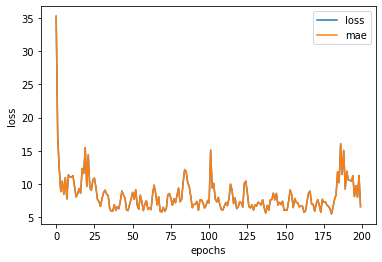

In [20]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_04

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_04=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_04.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['mae'])
# Fit the model
history=model_04.fit(x_train,y_train,epochs=500,verbose=0)

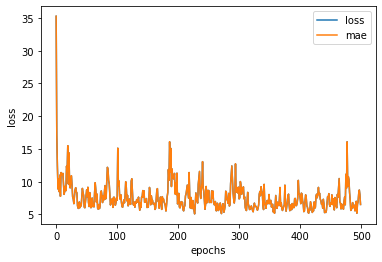

In [22]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_5

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_05=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_05.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_05.fit(x_train,y_train,epochs=1000,verbose=1)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 5ms/step - loss: 116.2972 - mae: 116.2972
Epoch 2/1000
3/3 [==============================] - 0s 5ms/step - loss: 69.3885 - mae: 69.3885
Epoch 3/1000
3/3 [==============================] - 0s 4ms/step - loss: 38.5667 - mae: 38.5667
Epoch 4/1000
3/3 [==============================] - 0s 6ms/step - loss: 33.5926 - mae: 33.5926
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 26.8945 - mae: 26.8945
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 24.0598 - mae: 24.0598
Epoch 7/1000
3/3 [==============================] - 0s 5ms/step - loss: 20.5108 - mae: 20.5108
Epoch 8/1000
3/3 [==============================] - 0s 5ms/step - loss: 17.0860 - mae: 17.0860
Epoch 9/1000
3/3 [==============================] - 0s 4ms/step - loss: 17.8943 - mae: 17.8943
Epoch 10/1000
3/3 [==============================] - 0s 4ms/step - loss: 18.5400 - mae: 18.5400
Epoch 11/1000
3/3 [==============================] - 0s 5ms/

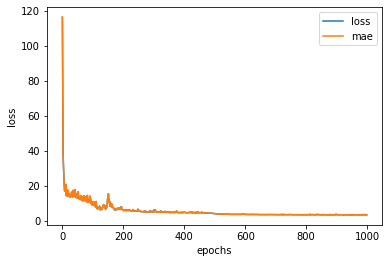

In [24]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [25]:
model_05.evaluate(x_test,y_test)

1/1 [==============================] - 0s 103ms/step - loss: 3.1156 - mae: 3.1156


[3.115572214126587, 3.115572214126587]

In [26]:
model_05.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
 dense_12 (Dense)            (None, 1000)              2000      
                                                                 
 dense_13 (Dense)            (None, 100)               100100    
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 103,127
Trainable params: 103,127
Non-trainable params: 0
_________________________________________________________________


# Preprocessing data

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["latitude","altitude","precipitation" ,"humidity","windspeed"])
)

# Create x & y
x=project_01.drop("temperature",axis=1)
y=project_01["temperature"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer o training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [28]:
x_train_normal[0]

array([0.85966469, 0.05375408, 0.22197991, 0.56862745, 0.04255319])

## normalisation models

### model_06

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_06=tf.keras.Sequential([
    # tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_06.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_06.fit(x_train_normal,y_train,epochs=200,verbose=1)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 0s 5ms/step - loss: 24.9192 - mae: 24.9192
Epoch 2/200
3/3 [==============================] - 0s 5ms/step - loss: 24.6602 - mae: 24.6602
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 24.3945 - mae: 24.3945
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 24.1209 - mae: 24.1209
Epoch 5/200
3/3 [==============================] - 0s 5ms/step - loss: 23.8405 - mae: 23.8405
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 23.5538 - mae: 23.5538
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 23.2603 - mae: 23.2603
Epoch 8/200
3/3 [==============================] - 0s 5ms/step - loss: 22.9566 - mae: 22.9566
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 22.6348 - mae: 22.6348
Epoch 10/200
3/3 [==============================] - 0s 6ms/step - loss: 22.2910 - mae: 22.2910
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss:

In [30]:
model_06.evaluate(x_test_normal,y_test)

1/1 [==============================] - 0s 104ms/step - loss: 4.1204 - mae: 4.1204


[4.120436191558838, 4.120436191558838]

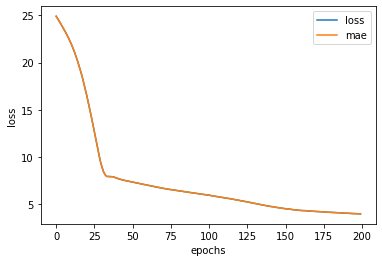

In [31]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_07

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_07=tf.keras.Sequential([
    # tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_07.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_07.fit(x_train_normal,y_train,epochs=500,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
model_07.evaluate(x_test_normal,y_test)

1/1 [==============================] - 0s 95ms/step - loss: 3.1226 - mae: 3.1226


[3.122591018676758, 3.122591018676758]

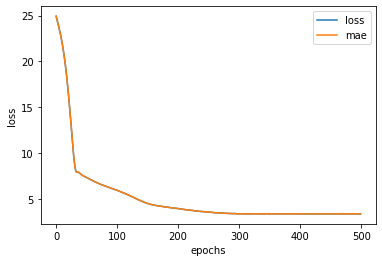

In [34]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_08

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 139ms/step - loss: 2.9731 - mae: 2.9731


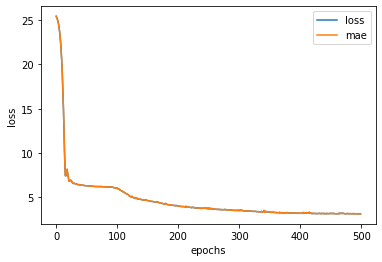

In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_08=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(10000),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_08.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_08.fit(x_train_normal,y_train,epochs=500,verbose=0)

# Evaluation
model_08.evaluate(x_test_normal,y_test)

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");


In [36]:
model_08.evaluate(x_test_normal,y_test)

1/1 [==============================] - 0s 16ms/step - loss: 2.9731 - mae: 2.9731


[2.973104476928711, 2.973104476928711]

### model_09

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 112ms/step - loss: 2.9522 - mae: 2.9522


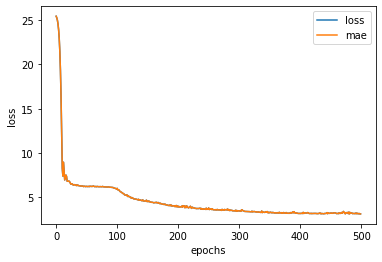

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_09=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    # tf.keras.layers.Dense(10000),
    # tf.keras.layers.Dense(1000),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    # tf.keras.layers.Dense(100),
    
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])
# Compile the model
model_09.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=['mae'])
# Fit the model
history=model_09.fit(x_train_normal,y_train,epochs=500,verbose=0)

# Evaluation
model_09.evaluate(x_test_normal,y_test)

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
